In [7]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from facenet_pytorch import MTCNN

C:\Users\72478072N\AppData\Local\anaconda3\envs\CursoIA\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


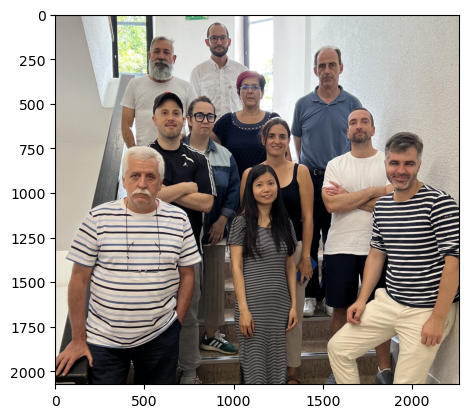

In [8]:
# open method used to open different extension image file
im = Image.open("./IMG_0862_new.jpg")
# This method will show image in any image viewer 
plt.imshow(im);

In [20]:
# Creamos definición para detectar caras
def mtcnn_face_detector(img):
    mtcnn = MTCNN()
    img = Image.open(img)
    boxes, _ = mtcnn.detect(img)
    
    return img, boxes

In [21]:
ruta_img = os.path.join("C:/Users/72478072N/Documents/CURSO_IA/MF1", "./IMG_0862_new.jpg")

In [22]:
img_grupo, caras_detectadas = mtcnn_face_detector(ruta_img)

(-0.5, 2266.5, 2072.5, -0.5)

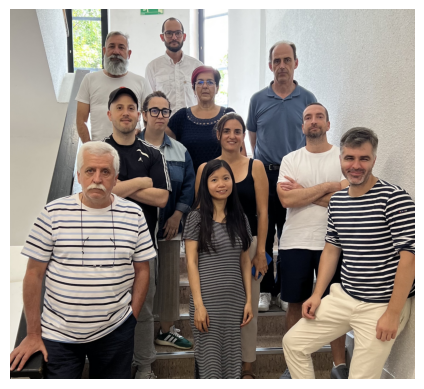

In [24]:
plt.imshow(img_grupo)
plt.axis("off")

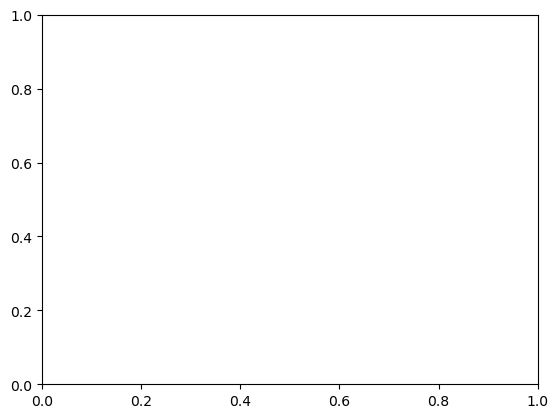

In [26]:
if caras_detectadas is not None:
    for box in caras_detectadas:
        x, y, w, h = box
        rect = plt.Rectangle((x, y), w - x, h - y, linewidth = 1, edgecolor = "r", facecolor = "none")
        plt.gca().add_patch(rect)

plt.show()

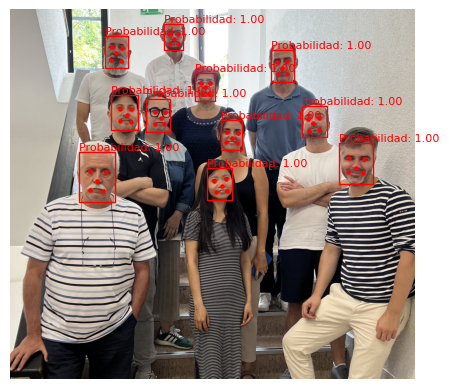

In [39]:
# Creamos definición para detectar caras
def mtcnn_face_detector(img):
    mtcnn = MTCNN()
    img = Image.open(img)
    boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)
    
    return img, boxes, probs, landmarks

ruta_img = os.path.join("C:/Users/72478072N/Documents/CURSO_IA/MF1", "./IMG_0862_new.jpg")

img_grupo, caras_detectadas, probabilidades, landmarks = mtcnn_face_detector(ruta_img)

plt.imshow(img_grupo)
plt.axis("off")

if caras_detectadas is not None:
    for box, prob, landmark in zip(caras_detectadas, probabilidades, landmarks):
        x, y, w, h = box
        rect = plt.Rectangle((x, y), w - x, h - y, linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)

        # Mostrar la probabilidad de que la bounding box contenga una cara
        plt.text(x, y - 10, f"Probabilidad: {prob:.2f}", color='red', fontsize=8)

        # Mostrar las coordenadas de los ojos, nariz y comisura de la boca en cada cara detectada
        for (x, y) in landmark:
            plt.scatter(x, y, s=5, c='red')

plt.show()


In [45]:
caras_detectadas.shape

(11, 4)

UnboundLocalError: cannot access local variable 'img' where it is not associated with a value

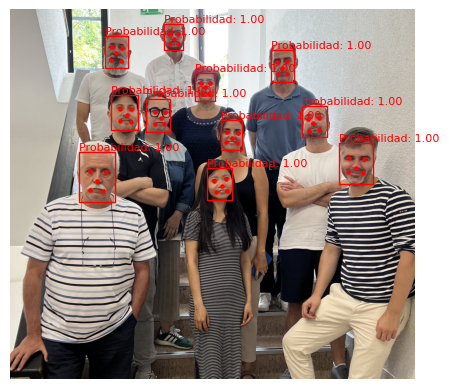

In [54]:
# Creamos definición para detectar caras
def mtcnn_face_detector(img):
    mtcnn = MTCNN(keep_all = True) # Utilizamos keep_all=True para obtener todas las caras detectadas
    img = Image.open(img)
    boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)
    
    return img, boxes, probs, landmarks

def extract_faces(img_path):
    mtcnn = MTCNN(keep_all = True) # Utilizamos keep_all=True para obtener todas las caras detectadas
    img = Image.open(img)
    face_tensors, _ = mtcnn(img)
    
    return face_tensors

ruta_img = os.path.join("C:/Users/72478072N/Documents/CURSO_IA/MF1", "./IMG_0862_new.jpg")

img_grupo, caras_detectadas, probabilidades, landmarks = mtcnn_face_detector(ruta_img)

plt.imshow(img_grupo)
plt.axis("off")

if caras_detectadas is not None:
    for box, prob, landmark in zip(caras_detectadas, probabilidades, landmarks):
        x, y, w, h = box
        rect = plt.Rectangle((x, y), w - x, h - y, linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)

        # Mostrar la probabilidad de que la bounding box contenga una cara
        plt.text(x, y - 10, f"Probabilidad: {prob:.2f}", color='red', fontsize=8)

        # Mostrar las coordenadas de los ojos, nariz y comisura de la boca en cada cara detectada
        for (x, y) in landmark:
            plt.scatter(x, y, s=5, c='red')

face_tensors = extract_faces(ruta_img)
for i, face_tensors in enumerate(face_tensors):
    plt.figure()
    plt.imshow(face_tensors.permute(1, 2, 0))
    plt.axis("off")
    plt.axis(f"Cara {i+1}")
    
plt.show()


In [53]:
face_tensors = extract_faces(ruta_img)
for i, face_tensors in enumerate(face_tensors):
    plt.figure()
    plt.imshow(face_tensors.permute(1, 2, 0))
    plt.axis("off")
    plt.axis(f"Cara {i+1}")
    
plt.show()

UnboundLocalError: cannot access local variable 'img' where it is not associated with a value

ValueError: too many values to unpack (expected 2)

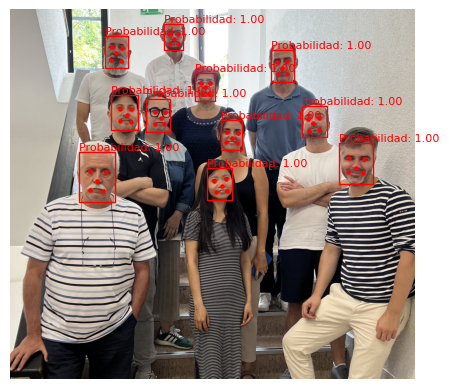

In [55]:
def mtcnn_face_detector(img):
    mtcnn = MTCNN(keep_all=True)  # Utilizamos keep_all=True para obtener todas las caras detectadas
    img = Image.open(img)
    boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)

    return img, boxes, probs, landmarks

def extract_faces(image_path):
    mtcnn = MTCNN(keep_all=True)  # Utilizamos keep_all=True para obtener todas las caras detectadas
    img = Image.open(image_path)
    face_tensors, _ = mtcnn(img)  # Usamos la función mtcnn directamente para obtener las caras extraídas

    return face_tensors

ruta_img = os.path.join("C:/Users/72478072N/Documents/CURSO_IA/MF1", "./IMG_0862_new.jpg")

img_grupo, caras_detectadas, probabilidades, landmarks = mtcnn_face_detector(ruta_img)

plt.imshow(img_grupo)
plt.axis("off")

if caras_detectadas is not None:
    for box, prob, landmark in zip(caras_detectadas, probabilidades, landmarks):
        x, y, w, h = box
        rect = plt.Rectangle((x, y), w - x, h - y, linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)

        # Mostrar la probabilidad de que la bounding box contenga una cara
        plt.text(x, y - 10, f"Probabilidad: {prob:.2f}", color='red', fontsize=8)

        # Mostrar las coordenadas de los ojos, nariz y comisura de la boca en cada cara detectada
        for (x, y) in landmark:
            plt.scatter(x, y, s=5, c='red')

# Tarea 6: Extracción de caras utilizando el método forward() y mostrarlas en pantalla
face_tensors = extract_faces(ruta_img)
for i, face_tensor in enumerate(face_tensors):
    plt.figure()
    plt.imshow(face_tensor.permute(1, 2, 0))  # El tensor tiene la forma (canales, altura, anchura)
    plt.axis('off')
    plt.title(f"Cara {i+1}")
    
plt.show()

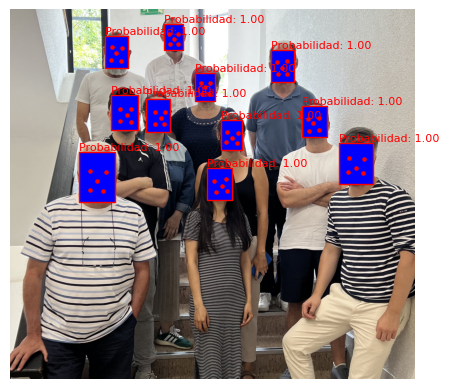

In [61]:
def mtcnn_face_detector(img):
    mtcnn = MTCNN(keep_all=True)  # Utilizamos keep_all=True para obtener todas las caras detectadas
    img = Image.open(img)
    boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)

    return img, boxes, probs, landmarks

def extract_faces(image_path):
    mtcnn = MTCNN(keep_all=True)  # Utilizamos keep_all=True para obtener todas las caras detectadas
    img = Image.open(image_path)
    face_tensors = mtcnn(img)  # Usamos la función mtcnn directamente para obtener las caras extraídas

    return face_tensors

ruta_img = os.path.join("C:/Users/72478072N/Documents/CURSO_IA/MF1", "./IMG_0862_new.jpg")

img_grupo, caras_detectadas, probabilidades, landmarks = mtcnn_face_detector(ruta_img)

plt.imshow(img_grupo)
plt.axis("off")

if caras_detectadas is not None:
    for box, prob, landmark in zip(caras_detectadas, probabilidades, landmarks):
        x, y, w, h = box
        rect = plt.Rectangle((x, y), w - x, h - y, linewidth=1, edgecolor='r', facecolor='b')
        plt.gca().add_patch(rect)

        # Mostrar la probabilidad de que la bounding box contenga una cara
        plt.text(x, y - 10, f"Probabilidad: {prob:.2f}", color='red', fontsize=8)

        # Mostrar las coordenadas de los ojos, nariz y comisura de la boca en cada cara detectada
        for (x, y) in landmark:
            plt.scatter(x, y, s=5, c='red')



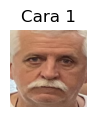

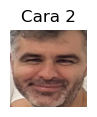

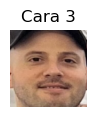

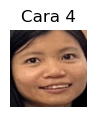

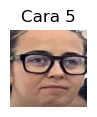

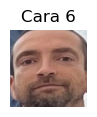

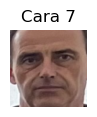

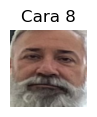

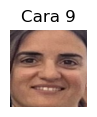

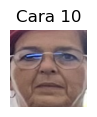

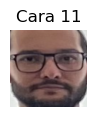

In [62]:
# Tarea 6: Extracción de caras utilizando el método forward() y mostrarlas en pantalla
face_tensors = extract_faces(ruta_img)
for i, face_tensor in enumerate(face_tensors):
    plt.figure(figsize = (1, 1))
    face_img = face_tensor.permute(1, 2, 0).numpy()
    face_img = (face_img - face_img.min()) / (face_img.max() - face_img.min())
    plt.imshow(face_img)  
    plt.axis('off')
    plt.title(f"Cara {i+1}")
    
plt.show()

In [ ]:
# Tarea 6: Extracción de caras utilizando el método forward() y mostrarlas en pantalla
face_tensors = extract_faces(ruta_img)
for i, face_tensor in enumerate(face_tensors):
    plt.figure(figsize = (1, 1))
    face_img = face_tensor.permute(1, 2, 0).numpy()
    face_img = (face_img - face_img.min()) / (face_img.max() - face_img.min())
    plt.imshow(face_img)  
    plt.axis('off')
    plt.title(f"Cara {i+1}")
    
plt.show()